In [64]:
import warnings

warnings.filterwarnings("ignore")

In [65]:
from typing import Annotated, Literal, Sequence, TypedDict
from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langgraph.graph.message import add_messages
from langgraph.prebuilt import tools_condition
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.tools.retriever import create_retriever_tool
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langchain_ollama import OllamaEmbeddings, OllamaLLM


In [66]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [67]:
embedding = OllamaEmbeddings(model = "nomic-embed-text")
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [69]:
llm.invoke("hello how are you?")

AIMessage(content="As an AI, I don't have feelings, but I'm here and ready to assist you! How can I help you today? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 14, 'total_tokens': 47, 'completion_time': 0.06, 'prompt_time': 8.114e-05, 'queue_time': 0.022068027, 'total_time': 0.06008114}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-4ff897b9-444f-4c1b-be52-8f7aa3e43a81-0', usage_metadata={'input_tokens': 14, 'output_tokens': 33, 'total_tokens': 47})

In [ ]:
# url= "https://lilianweng.github.io/posts/2023-06-23-agent/"

In [ ]:
# WebBaseLoader(url).load()

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [ ]:
# WebBaseLoader(url).load()[0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'title': "LLM Powered Autonomous Agents | Lil'Log",
 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\

In [ ]:
# WebBaseLoader(url).load()[0].metadata["description"]

'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model 

In [ ]:
# urls = [
#     "https://lilianweng.github.io/posts/2023-06-23-agent/",
#     # "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
# ]

In [ ]:
# docs = [WebBaseLoader(url).load() for url in urls]

In [ ]:
# docs

[[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final res

In [ ]:
# docs_list=[item for sublist in docs for item in sublist]

In [ ]:
# text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100, chunk_overlap=25)

In [ ]:
# doc_splits=text_splitter.split_documents(docs_list)

In [70]:
# doc_splits
loader = WebBaseLoader(web_path="https://learn.microsoft.com/en-us/azure/ai-services/computer-vision/overview-identity")
docs = loader.load()
splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
docs = splitter.split_documents(docs)
docs

[Document(metadata={'source': 'https://learn.microsoft.com/en-us/azure/ai-services/computer-vision/overview-identity', 'title': 'What is the Azure AI Face service? - Azure AI services | Microsoft Learn', 'description': 'The Azure AI Face service provides AI algorithms that you use to detect, recognize, and analyze human faces in images.', 'language': 'en-us'}, page_content='What is the Azure AI Face service? - Azure AI services | Microsoft Learn\n\n\n\n\nSkip to main content\n\n\nThis browser is no longer supported.\nUpgrade to Microsoft Edge to take advantage of the latest features, security updates, and technical support.\n\nDownload Microsoft Edge\nMore info about Internet Explorer and Microsoft Edge\n\n\n\n\n\n\n\n\n\n\n\n\n\nTable of contents\n\n\n\nExit focus mode\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nRead in English\n\n\n\n\nSave\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nTable of contents\n\n\n\nRead in English\n\n\n\n\nSave\n\n\n\n\n\nAdd to plan\n\n\n\n\nEdit\n\n\nShare 

In [71]:
vectorstore=Chroma.from_documents(
    documents=docs,
    collection_name="rag-chrome",
    embedding=embedding
    
)

In [72]:
retriever=vectorstore.as_retriever()

In [73]:
retriever_tool=create_retriever_tool(
    retriever,
    "retrieve_blog_posts",
    "Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.",
    )

In [74]:
tools=[retriever_tool]

In [75]:
retrieve=ToolNode([retriever_tool])

In [76]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [77]:
def ai_assistant(state:AgentState):
    print("---CALL AGENT---")
    messages = state['messages']
    
    if len(messages)>1:
        last_message = messages[-1]
        question = last_message.content
        prompt=PromptTemplate(
        template="""You are a helpful assistant whatever question has been asked to find out that in the given question and answer.
                        Here is the question:{question}
                        """,
                        input_variables=["question"]
                        )
            
        chain = prompt | llm
    
        response=chain.invoke({"question": question})
        return {"messages": [response]}
    else:
        llm_with_tool = llm.bind_tools(tools)
        response = llm_with_tool.invoke(messages)
        #response=handle_query(messages)
        return {"messages": [response]}

In [78]:
class grade(BaseModel):
    binary_score:str=Field(description="Relevance score 'yes' or 'no'")

In [79]:
def grade_documents(state:AgentState)->Literal["Output_Generator", "Query_Rewriter"]:
    llm_with_structure_op=llm.with_structured_output(grade)
    
    prompt=PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"]
                    )
    chain = prompt | llm_with_structure_op
    
    messages = state["messages"]
    last_message = messages[-1]
    question = messages[0].content
    docs = last_message.content
    scored_result = chain.invoke({"question": question, "context": docs})
    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generator" #this should be a node name
    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        return "rewriter" #this should be a node name

In [80]:
hub.pull("rlm/rag-prompt").pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [81]:
def generate(state:AgentState):
    print("---GENERATE---")
    messages = state["messages"]

    question = messages[0].content
    
    last_message = messages[-1]
    docs = last_message.content
    
    prompt = hub.pull("rlm/rag-prompt")
    
    rag_chain = prompt | llm

    response = rag_chain.invoke({"context": docs, "question": question})
    print(f"this is my response:{response}")
    
    return {"messages": [response]}

In [ ]:
from langchain_core.messages import  HumanMessage
def rewrite(state:AgentState):
    print("---TRANSFORM QUERY---")
    question = state["messages"][0]
    
    message = [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning. 
                    Here is the initial question: {question} 
                    Formulate an improved question: """)
       ]
    response = llm.invoke(message)
    return {"messages": [response]}

In [83]:
workflow=StateGraph(AgentState)
workflow.add_node("My_Ai_Assistant",ai_assistant)
workflow.add_node("Vector_Retriever", retrieve) 
workflow.add_node("Output_Generator", generate)
workflow.add_node("Query_Rewriter", rewrite) 

In [84]:
workflow.add_edge(START,"My_Ai_Assistant")

In [85]:
workflow.add_conditional_edges("My_Ai_Assistant",
                            tools_condition,
                            {"tools": "Vector_Retriever",
                                END: END,})

In [86]:
workflow.add_conditional_edges("Vector_Retriever",
                            grade_documents,
                            {"generator": "Output_Generator",
                            "rewriter": "Query_Rewriter"
                            }
                            )

In [87]:
workflow.add_edge("Output_Generator", END)

In [88]:
workflow.add_edge("Query_Rewriter", "My_Ai_Assistant")

In [89]:
app=workflow.compile()

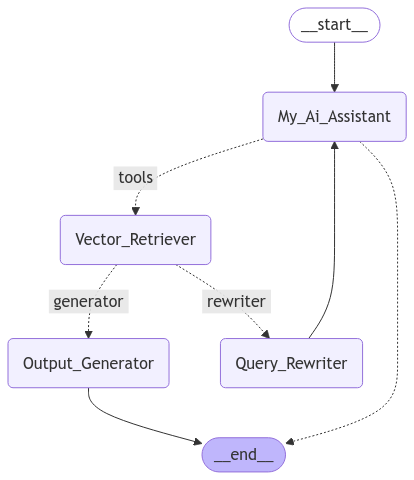

In [90]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [92]:
app.invoke({"messages":["What is Face service in Azure?"]})


---CALL AGENT---
---DECISION: DOCS RELEVANT---
---GENERATE---
this is my response:content='Azure AI Face service is a cloud-based service that uses AI algorithms to detect, recognize, and analyze human faces in images. It can be used for various applications such as identification, access control, and privacy protection. \nThe service is accessible through a client library SDK or REST API and is currently limited to Microsoft managed customers and partners. \n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 735, 'total_tokens': 808, 'completion_time': 0.132727273, 'prompt_time': 0.029976722, 'queue_time': 0.026663412, 'total_time': 0.162703995}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-342bc1d8-2ad9-4529-b25a-5cc5470ff75b-0' usage_metadata={'input_tokens': 735, 'output_tokens': 73, 'total_tokens': 808}


{'messages': [HumanMessage(content='What is Face service in Azure?', additional_kwargs={}, response_metadata={}, id='13e7e288-ce2e-4640-995f-625fe93f5234'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ggnp', 'function': {'arguments': '{"query":"What is Face service in Azure?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 1040, 'total_tokens': 1129, 'completion_time': 0.161818182, 'prompt_time': 0.045402338, 'queue_time': 0.024228283000000003, 'total_time': 0.20722052}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-a7bbb2b5-8209-4e33-b7fc-eac02e44055e-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'What is Face service in Azure?'}, 'id': 'call_ggnp', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1040, 'output_tokens': 89, 'total_tokens': 1129}),
  ToolMessage(conten

In [ ]:
app.invoke({"messages":["what is a prompt engineering explain me in terms of agents and langchain?"]})

---CALL AGENT---
---DECISION: DOCS RELEVANT---
---GENERATE---
this is my response:content="Prompt engineering, in the context of agents and LangChain, involves crafting effective instructions or prompts to guide the behavior of a language model (LLM) within an agent. \n\nThis technique allows you to steer the LLM's output towards desired results without altering the model's core weights. LangChain provides a framework for integrating LLMs with tools and other components, enabling the creation of sophisticated agents that leverage prompt engineering for complex tasks. \n" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 357, 'total_tokens': 450, 'completion_time': 0.169090909, 'prompt_time': 0.011340578, 'queue_time': 0.022897247, 'total_time': 0.180431487}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-b944009c-446e-4530-9b7b-22509afc6274-0' usage_metadata={'input_

{'messages': [HumanMessage(content='what is a prompt engineering explain me in terms of agents and langchain?', additional_kwargs={}, response_metadata={}, id='9dea35af-f25b-4143-80a7-9792858e14fd'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5hvz', 'function': {'arguments': '{"query":"prompt engineering langchain agents"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 1048, 'total_tokens': 1136, 'completion_time': 0.16, 'prompt_time': 0.042936627, 'queue_time': 0.020798543999999995, 'total_time': 0.202936627}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-cfa8f285-c9d0-4ecf-b253-4fbca9a0faba-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'prompt engineering langchain agents'}, 'id': 'call_5hvz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1048, 'output_tokens': 8

In [ ]:
app.invoke({"messages":["what is capital of india?"]})

---CALL AGENT---
---DECISION: DOCS NOT RELEVANT---
---TRANSFORM QUERY---
---CALL AGENT---


{'messages': [HumanMessage(content='what is capital of india?', additional_kwargs={}, response_metadata={}, id='e4c90bcb-20b2-411c-9e1c-560e4e20f754'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_qpnt', 'function': {'arguments': '{"query":"What is the capital of India?"}', 'name': 'retrieve_blog_posts'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 1039, 'total_tokens': 1127, 'completion_time': 0.16, 'prompt_time': 0.035440162, 'queue_time': 0.020381622000000002, 'total_time': 0.195440162}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-cd3ac2ba-9328-4bf4-8d12-b01fd23ca32c-0', tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'What is the capital of India?'}, 'id': 'call_qpnt', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1039, 'output_tokens': 88, 'total_tokens': 1127}),
  ToolMessage(content='format, wh